In [17]:
# Import the required libraries
import numpy as np
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import matplotlib.pyplot as plt
from random import sample
from numpy.random import uniform

# Visualasation: Perform PCA on the original data (so that 4-D data can be visualised in 2-D)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Algoritm

* Let **X** be the set of **n** data points.
* Consider a random sample (without replacement) of **m << n** data points with members x(i). suggest choosing 5% of the data points so that the **nearest-neighbor** distances will be independent and thus approximate a Beta distribution.
* Generate a set **Y** of m uniformly randomly distributed data points.
* Define two distance measures:
    * **u(i)**, the distance of **y(i)** in **Y** from its nearest neighbour in **X**, and
    * **w(i)**, the distance of **x(i)** in **X** from its nearest neighbour in **X**
* if the data is **d** dimensional, then the **Hopkins statistic** is defined as:
    * Hopkins statistic is a way of measuring the cluster tendency of a data set.
<img src="img/hopkins.svg" style="padding-top: 1rem; height:50px">



In [35]:
def hopkins_statistic(X, k = 2):
    
    # Convert dataframe to numpy array
    X = X.values;
    
    # Get sample size from data (5%)
    sample_size = int(X.shape[0]*0.05)
    
    # A uniform random sample in the original data space
    urs = uniform(X.min(axis = 0), X.max(axis = 0), (sample_size, X.shape[1])) 

    random_indices = sample(range(0, X.shape[0], 1), sample_size)
    samples = X[random_indices]
    
    # Initialise unsupervised learner for implementing neighbor searches
    neighbors = NearestNeighbors(n_neighbors = k)
    nbrs = neighbors.fit(X)
    
    # u_distances = nearest neighbour distances from uniform random sample
    u_distances, u_indices = nbrs.kneighbors(urs , n_neighbors = k)
    # distance to the first (nearest) neighbour
    u_distances = u_distances[: , 0]

    # w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(samples , n_neighbors = k)
    # distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    
    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    # Compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

## Dataset information

* Number of Instances: 150 (50 in each of three classes)
* Number of Attributes: 4 numeric, predictive attributes and the class (5 total)
* Attribute Information:
    1. sepal length in cm
    2. sepal width in cm
    3. petal length in cm
    4. petal width in cm
    5. class:
        - Iris Setosa
        - Iris Versicolour
        - Iris Virginica
* Missing Attribute Values: None


In [19]:
# Load data from iris dataset
dataset = pd.read_csv('./iris.data', header = None)
dataset

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [20]:
# Renaming columns
dataset.columns=['sepal length' , 'sepal width' , 'petal length', 'petal width', 'class']

# Independent attributes
X = dataset[['sepal length' , 'sepal width' , 'petal length', 'petal width']]

# Class attribute
y = dataset['class']
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

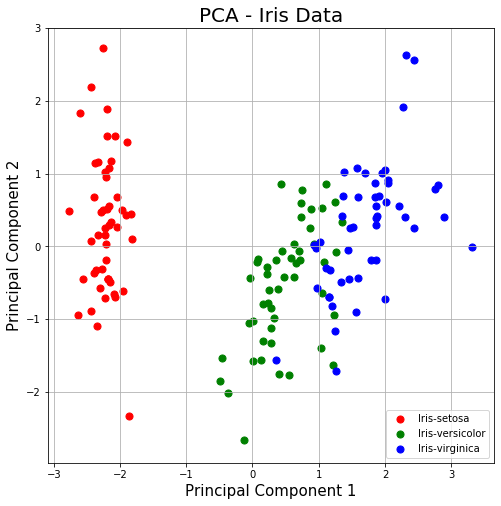

In [22]:
## Visualisation of Iris Dataset

# Standardizing the features
x = StandardScaler().fit_transform(X)

# Perform PCA
# 2 components = 2 Dimensions
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, dataset[['class']]], axis = 1)

# Plotting the data
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA - Iris Data', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

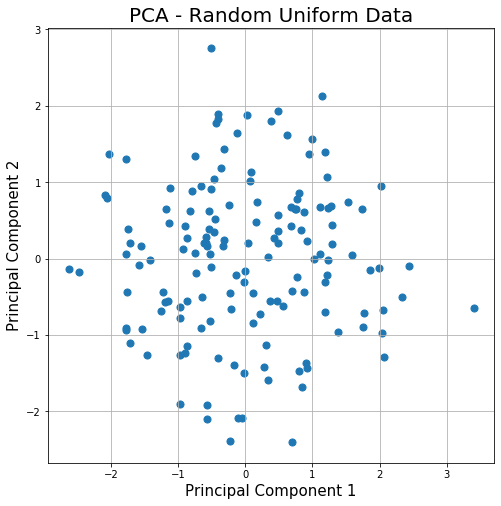

In [23]:
## We now generate a random uniform dataset and visually inspect if it has any clusters. 
## Again, we use PCA for dimensionality reduction

# Random uniform data
ur = np.random.uniform(X.min(axis=0), X.max(axis=0), (X.shape))

# Standardizing the features
x = StandardScaler().fit_transform(ur)

# Perform PCA
#2 components = 2 Dimensions
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = principalDf

# Plotting the data
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA - Random Uniform Data', fontsize = 20)
ax.scatter(finalDf['principal component 1'], finalDf['principal component 2'], s = 50)

ax.grid()

In [36]:
# Call the function on the iris dataset
H = hopkins_statistic(X)
print(H)

[[5.85212508 2.22316522 3.53506136 1.74125212]
 [4.55331992 2.18912639 4.58227217 0.67382349]
 [6.70357243 3.96702982 3.85085887 0.31743739]
 [5.01325388 3.11414308 5.17395279 2.07428497]
 [5.65636653 3.25312575 5.32179567 0.92408294]
 [7.21408644 2.65524724 1.22145902 1.31241774]
 [6.83019599 2.39266078 4.98304401 1.78176727]]
0.810712364570264


Since multiple calls of the function will result in different values of H, we call the function and compute Hopkins' Statistic multiple times, and take its average.

In [29]:
# List to hold values for each call
list = []

for i in range(20):
    H = hopkins_statistic(X)
    list.append(H)
    
# Print average value:
np.mean(list)

0.8366611163653742